In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

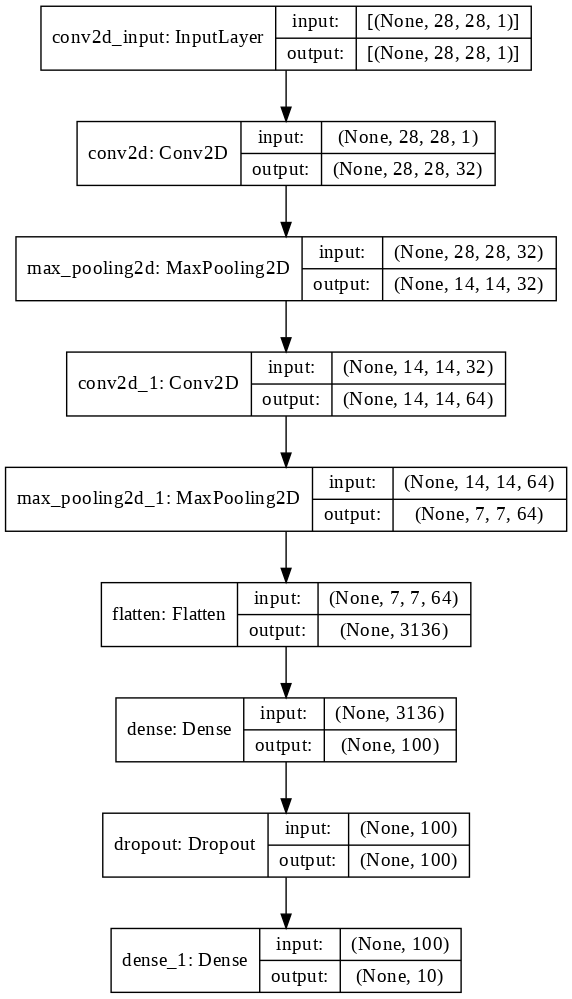

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=100)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 36s 3ms/step - loss: 0.5331 - accuracy: 0.8092 - val_loss: 0.3401 - val_accuracy: 0.8723
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3523 - accuracy: 0.8734 - val_loss: 0.2859 - val_accuracy: 0.8928
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3017 - accuracy: 0.8902 - val_loss: 0.2532 - val_accuracy: 0.9072
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2669 - accuracy: 0.9034 - val_loss: 0.2404 - val_accuracy: 0.9087
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2426 - accuracy: 0.9102 - val_loss: 0.2316 - val_accuracy: 0.9129
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2217 - accuracy: 0.9170 - val_loss: 0.2323 - val_accuracy: 0.9123
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2045 - accuracy: 0.9232 - val_loss: 0.2281 - val_accuracy

In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2281 - accuracy: 0.9177


[0.22813920676708221, 0.9176666736602783]

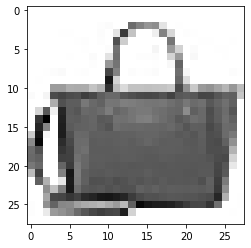

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.2881606e-16 3.6255187e-24 1.5875425e-18 5.3463290e-16 1.9059641e-17
  9.6759886e-19 3.1070495e-17 5.0163509e-20 1.0000000e+00 1.0034639e-19]]


In [ ]:
classes = ['tshirts','pants','sweater','dress','coat','sandal','shirts','sneakers','bag','boots']
import numpy as np
print(classes[np.argmax(preds)])

bag


In [ ]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2502 - accuracy: 0.9094


[0.2502285838127136, 0.9093999862670898]